In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Dataset.csv', sep = ';')

### 1. Оценить качество датасета

In [2]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4.0,999.0,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2.0,999.0,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1.0,999.0,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2.0,999.0,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2.0,999.0,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1.0,999.0,0,nonexistent
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1.0,999.0,1,failure
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4.0,999.0,0,nonexistent
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1.0,999.0,0,nonexistent


In [3]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('\n')

age
[ 49  37  78  36  59  29  26  30  50  33  44  32  43  56  40  47  34  46
  39  41  55  38  63  23  48  53  35  51  71  58  21  45  25  77  28  52
  80  57  22  60  27  24  31  42  54  81  64  79  20  76  82  19  68  65
  73  66  85  74  61  86  69  18  83  88  70  87  84  75  62  72  67  89
 126 131   4   7  17  91   1  98   5]


job
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']


marital
['married' 'divorced' 'single' 'unknown' nan]


education
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' nan 'illiterate']


default
['unknown' 'no' 'NO' 'No' 'yes']


housing
['no' 'yes' 'unknown' nan 'may be' 'Yes' 'YES' 'yeS' 'nO']


loan
['no' 'yes' 'unknown']


contact
['cellular' 'telephone' nan]


month
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']


day_of_week
['wed' 'mon' 'tue' 'fri' 'thu' nan]


duration
[ 227  202 

Посмотрев на все значения столбцов, присутствующих в датасете, можно заметить в столбцах default и housing одинаковые по смыслу, но разные по регистру значения. Для исправления данного недостатка лучше привести все значения к нижнему регистру

In [4]:
#При приведении к нижнему регистру нужно учитывать, что некоторые значения могут быть пропусками, то есть, nan.
data['default'] = list(map(lambda x: x.lower() if x == x else x, data['default']))
data['housing'] = list(map(lambda x: x.lower() if x == x else x, data['housing']))

In [5]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('\n')

age
[ 49  37  78  36  59  29  26  30  50  33  44  32  43  56  40  47  34  46
  39  41  55  38  63  23  48  53  35  51  71  58  21  45  25  77  28  52
  80  57  22  60  27  24  31  42  54  81  64  79  20  76  82  19  68  65
  73  66  85  74  61  86  69  18  83  88  70  87  84  75  62  72  67  89
 126 131   4   7  17  91   1  98   5]


job
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']


marital
['married' 'divorced' 'single' 'unknown' nan]


education
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' nan 'illiterate']


default
['unknown' 'no' 'yes']


housing
['no' 'yes' 'unknown' nan 'may be']


loan
['no' 'yes' 'unknown']


contact
['cellular' 'telephone' nan]


month
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']


day_of_week
['wed' 'mon' 'tue' 'fri' 'thu' nan]


duration
[ 227  202 1148 ... 1882 1666 1434]


campai

In [6]:
x = data['age'].value_counts() 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(x)

31     1550
32     1474
33     1443
35     1417
34     1402
36     1401
30     1364
29     1171
37     1159
38     1139
39     1131
41     1031
40      945
42      915
45      871
43      827
44      826
46      823
28      799
48      774
47      747
50      707
27      675
49      670
52      625
51      601
53      583
26      582
56      562
54      556
55      527
57      521
25      488
58      455
24      381
59      374
60      223
23      181
22      102
21       80
61       61
62       53
20       52
66       45
71       45
64       43
63       41
65       38
70       37
19       37
72       31
73       30
76       29
68       28
80       26
69       25
67       24
18       22
74       20
78       20
77       18
88       17
75       16
82       15
81       14
83       12
85       11
79       11
86        6
84        5
17        3
5         3
89        2
131       1
87        1
98        1
4         1
91        1
1         1
126       1
7         1
Name: age, dtype: int64


Данные адекватные. Смущают только значения 126 и 131 в "age".

а. Наличие дубликатов

In [7]:
data_without_duplicates = data.loc[:,~data.columns.duplicated()]
data_without_duplicates.shape[1] == data.shape[1]

True

In [8]:
data = data_without_duplicates

Дублирующих друг друга столбцов нет.

b. Наличие пропусков

In [9]:
data.isnull().sum()

age            0
job            0
marital        3
education      2
default        0
housing        1
loan           0
contact        3
month          0
day_of_week    1
duration       0
campaign       1
pdays          2
previous       0
poutcome       0
dtype: int64

Пропуски есть, но по сравнению с размером датасета их количество пренебрежимо мало, так что их можно без вреда выбросить.

In [10]:
data = data.dropna()

c. Наличие аномалий

In [11]:
data_num = data.loc[:, data.dtypes != 'object']

In [12]:
data_num.describe()

,age,duration,campaign,pdays,previous
count,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000
mean,40.015332,258.139626,2.560751,962.038952,0.174783
std,10.437695,259.006508,2.752631,187.984008,0.499104
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,131.000000,4918.000000,56.000000,999.000000,7.000000


Как можно заметить, pdays практически полностью состоит из чисел 999, так что её можно исключить из рассмотрения при поиске выбросов с помощью boxplot. previous также практически полностью сконцентрирована возле нуля, так что её также можно не рассматривать при поиске выбросов.

In [13]:
data_num = data_num.drop(['previous', 'pdays'], axis = 1)

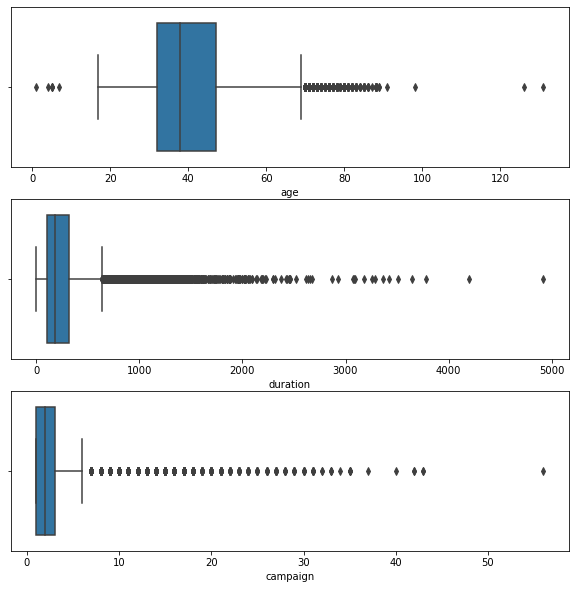

In [14]:
fig, ax = plt.subplots(len(data_num.columns), figsize = (10, 10))
for i in range(len(data_num.columns)):
    sns.boxplot(ax = ax[i], x = data_num[data_num.columns[i]])

Графики boxplot показывают, что во всех числовых присутствует значительное количество выбросов. Это может говорить как о действительно значительном количестве выбросов, так и о пологости распределений соответствующих столбцов. Тем не менее, по сравнению с размером датасета их количество достаточно мало.

### 2. Провести разведывательный анализ

а. Построить распределение каждой переменной. Какие выводы (для бизнеса) можно сделать на основании них?

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seab

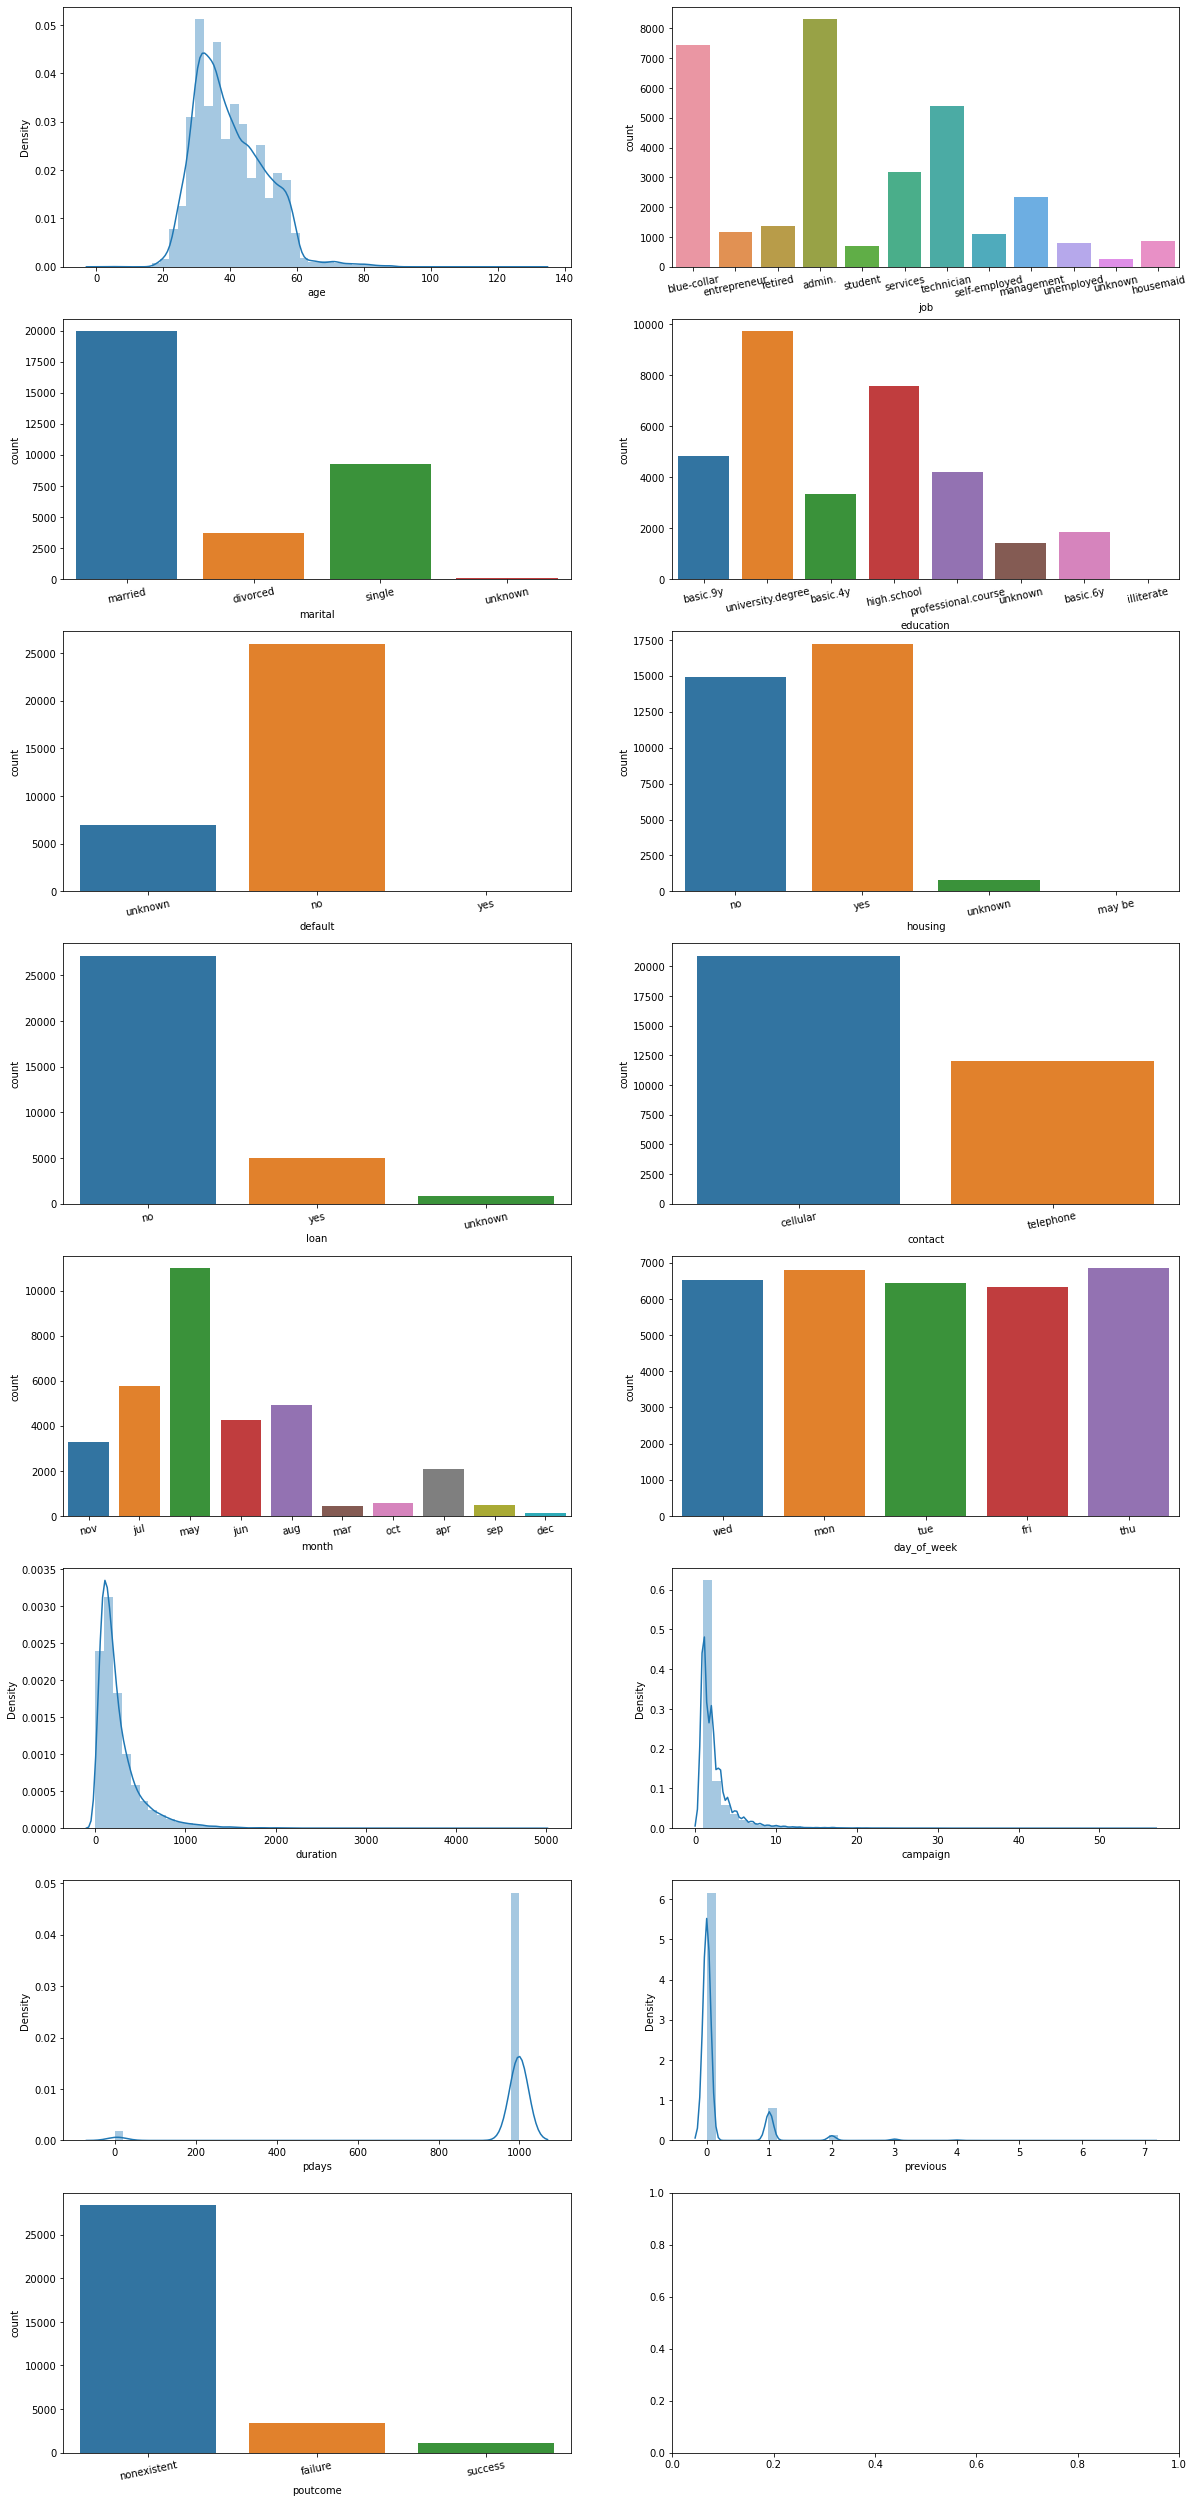

In [15]:
N = data.shape[1]
fig, ax = plt.subplots(int(N/2+1), 2, figsize = (20, 45))
for i in range(int(N/2+1)):
    for j in range(2):
        if (2*i+j >= len(data.columns)):
            continue
        if data.dtypes[2*i+j] == 'O':
            sns.countplot(data.loc[:, data.columns[2*i+j]], ax = ax[i][j])
            for tick in ax[i][j].get_xticklabels():
                tick.set_rotation(12)
        else:
            sns.distplot(data.loc[:, data.columns[2*i+j]], ax = ax[i][j])

Насчёт переменных можно сделать следующие выводы:
- age: распределение возрастов похоже на логнормальное с модой, близкой к 30 годам. Это соотносится с нуждами банков, так как чаще всего к данному возрасту людям требуются кредиты, и при этом у этих людей уже есть стабильный доход.
- job: 3 самые частые профессии, которые были выбраны маркетинговыми компаниями - это администраторы (admin), занятые физическим трудом (blue-collar) и техники (technician).
- marital: чаще всего звонили людям, состоящим в браке.
- education: можно заметить, что чем выше уровень образования, тем чаще отдавали предпочтение, что соотносится с тем фактом, что чаще всего люди с более высоким уровнем образования имеют более стабильный доход.
- default: чаще всего выбирали людей, у которых не было невыплат по кредитам. Людей, у которых они были, практически не выбирали, однако значимо часто выбирали тех, чья ситуация с невыплатами не была известна.
- housing: можно заметить, что при проведении маркетинга равновероятно (примерно) выбирали как людей с ссудой на жильё, так и людей без неё.
- loan: значимо чаще при проведении маркетинга выбирали людей без персонального кредита.
- contact: чаще звонок приходился на персональный телефон, чем на домашний.
- month: наблюдается существенный пик звонков в мае (за месяц до лета) и в летние месяцы. Это может обосновываться тем, что в эти месяца люди часто берут отпуска, и в эти отпуска хотят съездить на отдых, на что берут кредиты. Также можно заметить рост частоты звонков ближе к летним месяцам и снижение ближе к зимним. Ещё наблюдается отдельный пик в ноябре. 
- day_of_week: частота звонков в каждый рабочий день одинакова. В выходные же звонков не наблюдается.
- duration: длительность звонков имеет приблизительно экспоненциальное распределение.
- campaign: распределение количества звонков во время кампании, требуемого для среднестатистического клиента, в основном равно единице. Это означает, что чаще всего не требовались повторные звонки.
- pdays: так как абсолютное большинство значений сконцентрировано возле 999, это значит, что с большинством клиентов в прошлом не было контакта.
- previous: данные по переменной previous соответствуют данным pdays в том смысле, что большей части клиентов не было звонков в прошлом.
- poutcome: распределение переменной poutcome также соответствует данным pdays и previous в том смысле, что в большинстве случаев предыдущих маркетинговых кампаний не было. Также нужно отметить, что, когда они были, то чаще они были провальными, чем удачными, что может говорить о недостатках стратегий.

In [16]:
data.corr(method = 'spearman')

,age,duration,campaign,pdays,previous
age,1.000000,-0.000872,0.004226,0.000699,-0.016165
duration,-0.000872,1.000000,-0.084268,-0.083039,0.044610
campaign,0.004226,-0.084268,1.000000,0.056488,-0.086980
pdays,0.000699,-0.083039,0.056488,1.000000,-0.510678
previous,-0.016165,0.044610,-0.086980,-0.510678,1.000000


Между большинством численных данных нет никакой значимой корреляции, однако между pdays и previous существует значимая отрицательная корреляция, что соответствует их смыслам (pdays - количество дней с прошлого звонка данному клиенту, previous - количество звонков в прошлом данному клиенту)

### 3. Используя одну из переменных, выполнить сэмплирование. Показать, что полученная выборка репрезентативна

Выполним сэмплирование по месяцу, отобрав данные из пиковых для маркетинговых кампаний месяца - мая, июня и июля.

In [17]:
data_subset = data[(data['month'] == 'may') | (data['month'] == 'jun') | (data['month'] == 'jul')]
data_subset = data_subset.drop(['month'], axis = 1)

Для проверки репрезентативности подвыборки посмотрим на распределения признаков в подвыборке и оригинальной выборке и сравним их

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


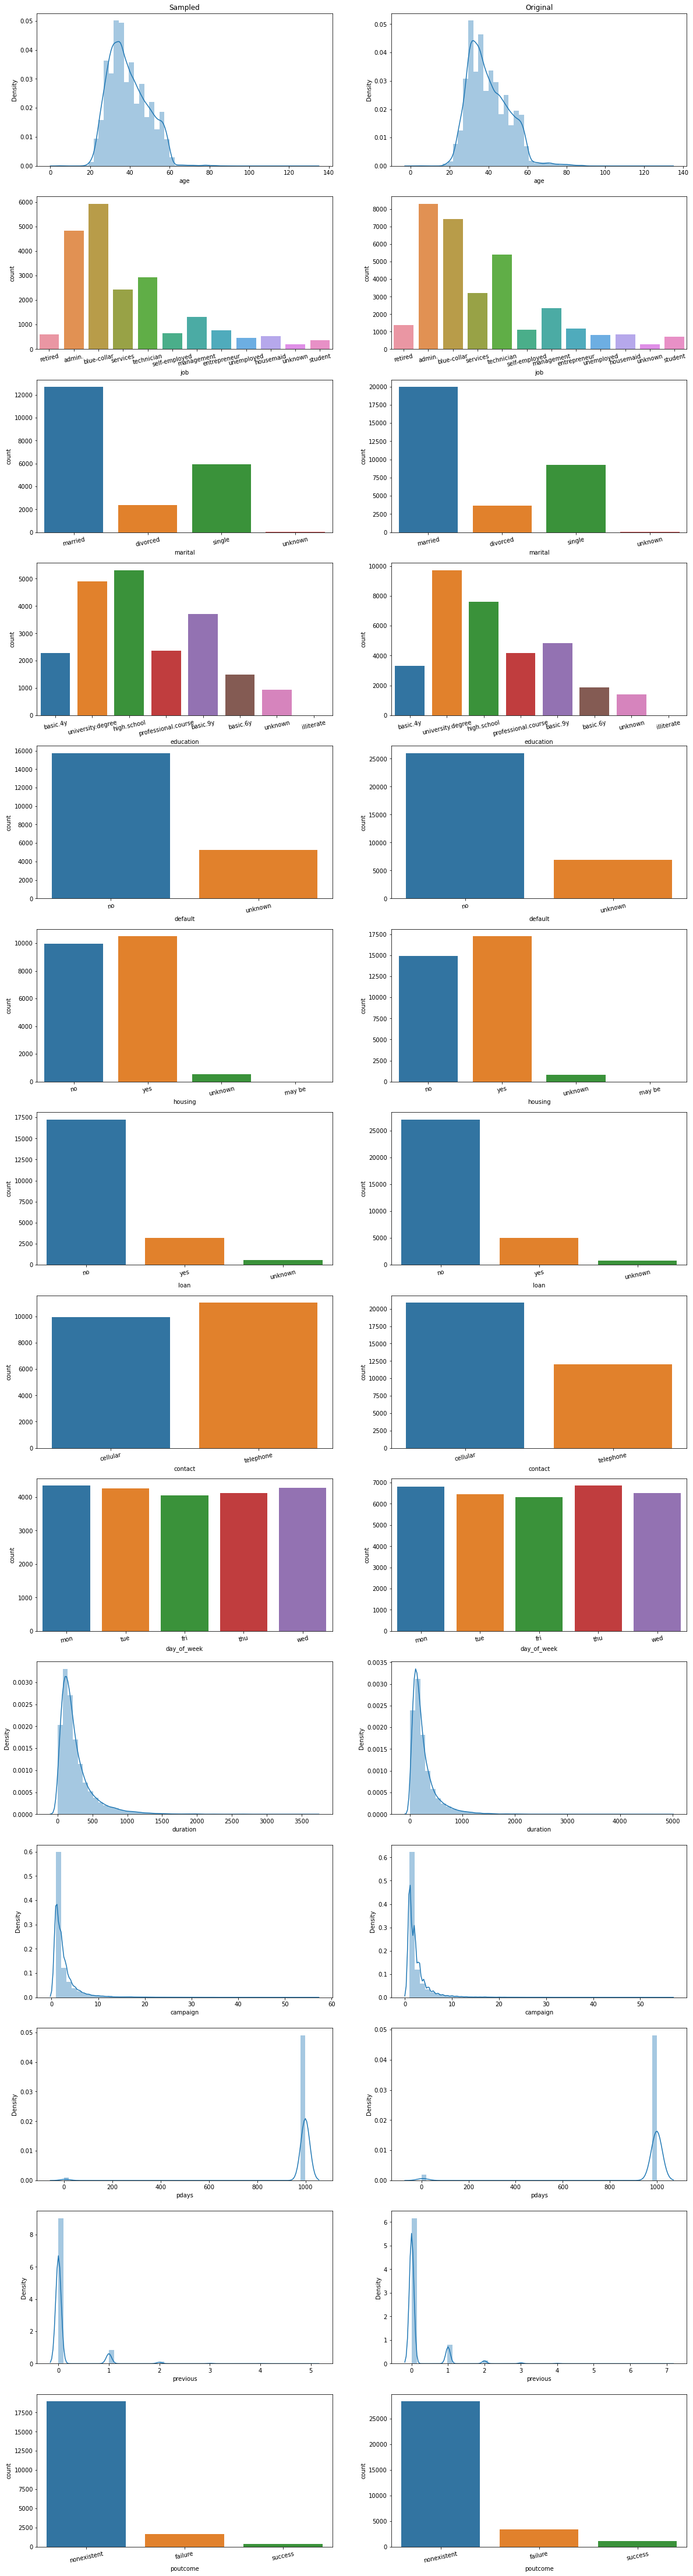

In [20]:
N = data_subset.shape[1]
fig, ax = plt.subplots(N, 2, figsize = (20, 80))
for i in range(int(N)):
    if i == 0:
        ax[i][0].set_title('Sampled')
        ax[i][1].set_title('Original')
    if data_subset.dtypes[data_subset.columns[i]] == 'O':
        order_bins = data_subset.loc[:, data_subset.columns[i]].unique()
        sns.countplot(data_subset.loc[:, data_subset.columns[i]], ax = ax[i][0], order = order_bins)
        for tick in ax[i][0].get_xticklabels():
            tick.set_rotation(12)
                
        sns.countplot(data.loc[:, data_subset.columns[i]], ax = ax[i][1], order = order_bins)
        for tick in ax[i][1].get_xticklabels():
            tick.set_rotation(12)
    else:
        sns.distplot(data_subset.loc[:, data_subset.columns[i]], ax = ax[i][0])
        sns.distplot(data.loc[:, data_subset.columns[i]], ax = ax[i][1])

Как можно заметить, распределения каждой переменной в подвыборке и оригинальном датасете очень близки друг к другу (нет значимых различий за исключением переменной contact), что говорит о репрезентативности полученной выборки

### 4.Оценка возможности использования данных в моделях машинного обучения.

Данные представляют из себя совокупность категориальных и числовых признаков, причём категориальных значительно больше.
В текущем виде в данных отсутствует разметка результата, так что их можно использовать для решения задачи кластеризации при введении соответствующей метрики, пригодной для смешанных данных (например, метрика Гауэра). Кластеризация клиентов может выявить особенности, учитывание которых повысит эффективность маркетинга. 

Из методов кластеризации можно порекомендовать такой метод как DBSCAN. Он позволит качественно выделить кластеры, а также выделить аномальные случаи, чаще всего не несущие требуемой информации.

При добавлении к данным разметки результата можно на их основе предсказывать успешность текущей попытки - решать задачу бинарной классификации.

Для решения задачи бинарной классификации в данном случае можно порекомендовать такие модели, как логистическая регрессия, случайный лес, дерево решений, градиентный бустинг. Все эти методы хорошо работают в случае большого количества категориальных признаков. Логистическая регрессия и дерево решений также позволят получить и интерпретируемые результаты, так что эти модели могут помочь не только при выборе клиентов, но и дать информацию для планирования самой маркетинговой стратегии.